## SITIOS DE CONSUMO

Una empresa en Lima que fabrica productos de consumo masivo posee 3 plantas de producción: A, B, C y 5 sitios de consumo: T1, T2, T3, T4, T5.

A. Modelar de forma manual el enunciado a partir de un grafo dirigido/ponderado y hallar, si existe, un conjunto de caminos de consumo de productos enviados desde un lugar de producción inicial hasta el de consumo final.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
production = ['A','B','C']
consume = ['T1','T2','T3','T4','T5']

edges = [('A','T1'),
         ('A','T3'),
         ('B','T2'),
         ('B','T4'),
         ('C','T3'),
         ('C','T4'),
         ('C','T5')]

In [4]:
# Generate adjacency list from a list of edges
def generate_adjlist(edges):
    graph_dict = dict()
    for edge in edges:
        source, target = edge
        if source not in graph_dict:
            graph_dict[source] = []
        graph_dict[source].append(target)
    return graph_dict
#Example
adj_list = generate_adjlist(edges)
adj_list

{'A': ['T1', 'T3'], 'B': ['T2', 'T4'], 'C': ['T3', 'T4', 'T5']}

In [5]:
union_graph = nx.Graph()
union_graph.add_edges_from(edges)

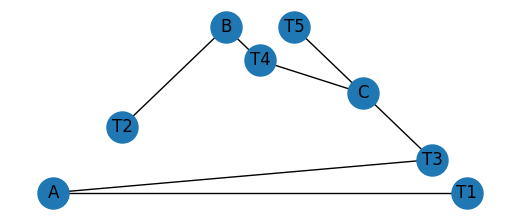

In [6]:
def visualize_graph():
    plt.figure(figsize=(5, 2))
    pos = nx.planar_layout(union_graph)
    nx.draw(union_graph, pos, with_labels=True, node_size=500)
    plt.show()
visualize_graph()

## Solucion

In [7]:
def change_weight(valor, nuevo_peso, consume_weights):
    for lista in consume_weights:
        if lista[0] == valor:
            lista[1] = nuevo_peso
            break

In [72]:
def total_flow(adj_list):
    production_weights = [['A', 5], ['B', 4], ['C', 7]]
    consume_weights = [['T1', 3], ['T2', 4], ['T3', 5], ['T4', 2], ['T5', 1]]
    edge_weights = []
    
    i = total = 0
    prod = production_weights[i]
    
    queue = []
    queue.append(prod) #Site of production where we are 
    
    while queue:
        u, w = queue.pop()
        # Getting v
        if i != (len(production_weights)-1):
            i+=1
            queue.append(production_weights[i])
        lst = adj_list[u]
        # Findind the new flow 
        for v in lst:
            for con in consume_weights:
                if con[0] == v:
                    g = con[1]
                    if g < w:
                        edge_weights.append(g)
                        w = abs(w-g)
                        g = 0
                    elif g > w:
                        edge_weights.append(w)
                        g = abs(g-w)
                        w = 0
                    else:
                        edge_weights.append(g)
                        g = w = 0
                    change_weight(v, g, consume_weights)
                    change_weight(u, w, production_weights)
                    total = total + w+g
    print(production_weights)
    print(consume_weights)
    print("Flujo total: %d" % sum(edge_weights))
total_flow(adj_list=adj_list)

[['A', 0], ['B', 0], ['C', 1]]
[['T1', 0], ['T2', 0], ['T3', 0], ['T4', 0], ['T5', 0]]
Flujo total: 15
